<a href="https://colab.research.google.com/github/Kwangbin/finance/blob/main/starbucks_ediya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. matplotlib version updgrade (v3.2.2 to v3.4.1)
!pip install matplotlib -U
import matplotlib as mpl
mpl.__version__


     |████████████████████████████████| 11.2 MB 7.7 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


'3.2.2'

In [2]:

# 2. 한글 폰트 설치
# https://velog.io/@jgpark1998/Colab-%ED%95%9C%EA%B8%80-%EA%B9%A8%EC%A7%90-RuntimeWarning-%EC%98%A4%EB%A5%98-%ED%95%B4%EA%B2%B0%ED%95%98%EA%B8%B0
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (4,796 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and d

In [1]:

#3. 런타임 다시시작

#4. import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
# 한글 사용
plt.rc('font', family='NanumBarunGothic') 


<AxesSubplot:title={'center':'한글폰트'}>

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


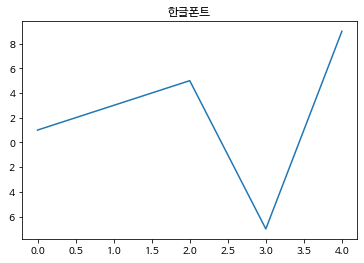

In [2]:

#5. 한글 출력 확인
# 한글폰트 확인하기
pd.Series([1, 3, 5, -7, 9]).plot(title="한글폰트")

In [4]:
#folium 설치
!pip install folium

In [5]:
import folium
import json
import glob
import os
import pandas as pd
import numpy as np

https://wooiljeong.github.io/python/folium/

스타벅스 및 이디야 데이터 가져오기

지도 상에 스타벅스, 이디야 점포들을 시각화하기 위해서는 각각의 점포들의 위치 정보를 알아야 합니다. 소상공인시장진흥공단에서 제공하는 상권정보 데이터에는 스타벅스, 이디야 뿐 아니라 전국의 다양한 업종의 상가업소 정보가 담겨있습니다. 이 데이터는 현재 공공데이터포털에서 다운로드 받을 수 있습니다. Open API로 데이터를 불러오는 방법도 있지만 이번 포스팅에서는 CSV 파일을 직접 다운로드 받아 시각화하도록 하겠습니다.

공공데이터포털 - 상가(상권)정보에 접속합니다. 19년 10월 현재 기준 가장 최근 데이터인소상공인시장진흥공단_상가업소정보_201906.zip을 다운로드합니다.


In [7]:
cd drive/My Drive/ml

/content/drive/My Drive/ml


In [8]:
cd data/star_edi/

/content/drive/My Drive/ml/data/star_edi


In [9]:
ls

'소상공인시장진흥공단_상가(상권)정보_대구_202109.csv'
'소상공인시장진흥공단_상가(상권)정보_제주_202109.csv'
'소상공인시장진흥공단_상가(상권)정보_경기_202109.csv'
'소상공인시장진흥공단_상가(상권)정보_광주_202109.csv'
'소상공인시장진흥공단_상가(상권)정보_대전_202109.csv'
'소상공인시장진흥공단_상가(상권)정보_부산_202109.csv'
'소상공인시장진흥공단_상가(상권)정보_서울_202109.csv'
'소상공인시장진흥공단_상가(상권)정보_세종_202109.csv'
'소상공인시장진흥공단_상가(상권)정보_강원_202109.csv'
'소상공인시장진흥공단_상가(상권)정보_경북_202109.csv'
'소상공인시장진흥공단_상가(상권)정보_울산_202109.csv'
'소상공인시장진흥공단_상가(상권)정보_경남_202109.csv'
'소상공인시장진흥공단_상가(상권)정보_인천_202109.csv'
'소상공인시장진흥공단_상가(상권)정보_전남_202109.csv'
'소상공인시장진흥공단_상가(상권)정보_전북_20

In [10]:
df=pd.read_csv('소상공인시장진흥공단_상가(상권)정보_서울_202109.csv',engine='python',encoding='utf-8')

In [12]:
#데이터 컬럼 확인하기
print('컬럼수 항목 수:',len(df.columns))
list(df.columns)

컬럼수 항목 수: 39


['상가업소번호',
 '상호명',
 '지점명',
 '상권업종대분류코드',
 '상권업종대분류명',
 '상권업종중분류코드',
 '상권업종중분류명',
 '상권업종소분류코드',
 '상권업종소분류명',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드',
 '시도명',
 '시군구코드',
 '시군구명',
 '행정동코드',
 '행정동명',
 '법정동코드',
 '법정동명',
 '지번코드',
 '대지구분코드',
 '대지구분명',
 '지번본번지',
 '지번부번지',
 '지번주소',
 '도로명코드',
 '도로명',
 '건물본번지',
 '건물부번지',
 '건물관리번호',
 '건물명',
 '도로명주소',
 '구우편번호',
 '신우편번호',
 '동정보',
 '층정보',
 '호정보',
 '경도',
 '위도']

In [13]:
# 상권업종 간단하게 확인하기
print('='*70)
print('상권업종대분류명', set(df['상권업종대분류명']))
print('='*70)
print('상권업종중분류명', set(df['상권업종중분류명']))
print('='*70)


상권업종대분류명 {'소매', '음식', '생활서비스', '부동산', '학문/교육', '스포츠', '숙박', '관광/여가/오락'}
상권업종중분류명 {'취미/오락관련소매', '의약/의료품소매', '기타음식업', '학원-음악미술무용', '이/미용/건강', '의복의류', '건강/미용식품', '분식', '운동/경기용품소매', '장례/묘지', '기타서비스업', '캠프/별장/펜션', '페인트/유리제품소매', '종합소매점', '스포츠/운동', '제과제빵떡케익', '예식/의례/관혼상제', '운영관리시설', '책/서적/도서', '개인/가정용품수리', '자동차/이륜차', '패스트푸드', '유흥주점', '음/식료품소매', '부페', '시계/귀금속소매', '세탁/가사서비스', '학원-창업취업취미', '학문교육기타', '선물/팬시/기념품', '주택수리', '기타판매업', '실외운동시설', '무도/유흥/가무', '일식/수산물', '요가/단전/마사지', '예술품/골동품/수석/분재', '주유소/충전소', '음식배달서비스', '애견/애완/동물', '사진', '모텔/여관/여인숙', '가정/주방/인테리어', '유스호스텔', '도서관/독서실', '별식/퓨전요리', '자동차/자동차용품', '한식', '양식', '경마/경륜/성인오락', '분양', '학원-예능취미체육', '가구소매', '화장품소매', '학원-보습교습입시', '호텔/콘도', '실내운동시설', '가방/신발/액세서리', '법무세무회계', '놀이/여가/취미', '연극/영화/극장', '중고품소매/교환', '학원기타', '커피점/카페', '유아교육', '물품기기대여', '학원-컴퓨터', '유아용품', '가전제품소매', '학원-어학', '학원-자격/국가고시', '개인서비스', '사진/광학/정밀기기소매', '중식', '대중목욕탕/휴게', '철물/난방/건설자재소매', '종교용품판매', '평가/개발/관리', '부동산중개', '닭/오리요리', '부동산관련서비스', '민박/하숙', '운송/배달/택배', '행사/이벤트', '대행업', '광고/인쇄', 'PC/

In [14]:
#관련정보만 추출

dataset=df[['상호명','지점명',
              '상권업종대분류명', '상권업종중분류명',
              '시도명', '시군구명', '행정동명',
              '위도', '경도']]
dataset.head()

,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,위도,경도
0,BYC상신점,상신점,소매,의복의류,서울특별시,송파구,거여2동,37.493054,127.147321
1,제중건강원,NaN,소매,건강/미용식품,서울특별시,영등포구,영등포동,37.520613,126.907168
2,민속악기사,NaN,소매,취미/오락관련소매,서울특별시,성동구,용답동,37.566857,127.049018
3,쓰리에프,NaN,음식,한식,서울특별시,동작구,사당2동,37.487105,126.980952
4,채움,NaN,음식,한식,서울특별시,종로구,종로1.2.3.4가동,37.572387,126.981794


In [16]:
#커피 전문점 데이터 추출
#여러 상권업소 중 서울시 내 커피 전문점 업소만 추출해 df_coffee를 정의합니다.
#즉, 시도명이 서울특별시이면서, 상권업종중분류명이 커피점/카페인 경우를 뜻합니다.

df_coffee = dataset[(dataset['상권업종중분류명']=='커피점/카페')&(dataset['시도명']=='서울특별시')]
df_coffee.index = range(len(df_coffee))
print('서울시 내 커피 전문점 점포 수 :', len(df_coffee))
df_coffee.head()

서울시 내 커피 전문점 점포 수 : 19703


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,위도,경도
0,커피빈,코리아대학로대명거리점,음식,커피점/카페,서울특별시,종로구,혜화동,37.583149,127.000171
1,요거프레소,쌍문점,음식,커피점/카페,서울특별시,도봉구,쌍문2동,37.658728,127.034746
2,메머드커피,NaN,음식,커피점/카페,서울특별시,마포구,서교동,37.554599,126.929692
3,버블베어,NaN,음식,커피점/카페,서울특별시,강서구,방화3동,37.580941,126.813358
4,우성커피숍,NaN,음식,커피점/카페,서울특별시,양천구,신월4동,37.522055,126.842935


In [22]:
#스타벅스 데이터 추출

df_seoul_starbucks = df_coffee[df_coffee['상호명'].str.contains('스타벅스')]
df_seoul_starbucks.index = range(len(df_seoul_starbucks))
print('서울시 내 스타벅스 점포 수 :', len(df_seoul_starbucks))
df_seoul_starbucks.head()

서울시 내 스타벅스 점포 수 : 488


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,위도,경도
0,스타벅스,동숭로아트점,음식,커피점/카페,서울특별시,종로구,이화동,37.582964,127.003887
1,스타벅스남부터미널2점,남부터미널2점,음식,커피점/카페,서울특별시,서초구,서초3동,37.484386,127.014198
2,스타벅스,현대목동점,음식,커피점/카페,서울특별시,양천구,목1동,37.527147,126.874682
3,스타벅스,당산점,음식,커피점/카페,서울특별시,영등포구,당산2동,37.535134,126.899952
4,스타벅스,가로수길점,음식,커피점/카페,서울특별시,강남구,신사동,37.523184,127.021629


In [23]:
#이디야 데이터 추출

df_seoul_ediya = df_coffee[df_coffee['상호명'].str.contains('이디야')]
df_seoul_ediya.index = range(len(df_seoul_ediya))
print('서울시 내 이디야 점포 수 :', len(df_seoul_ediya))
df_seoul_ediya.head()

서울시 내 이디야 점포 수 : 434


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,위도,경도
0,이디야커피,신길역점,음식,커피점/카페,서울특별시,영등포구,신길1동,37.515118,126.918062
1,이디야커피,라이프점,음식,커피점/카페,서울특별시,영등포구,여의동,37.519544,126.939198
2,이디야커피,시흥점,음식,커피점/카페,서울특별시,금천구,시흥2동,37.449066,126.913646
3,이디야커피양재AT점,양재AT점,음식,커피점/카페,서울특별시,서초구,양재2동,37.469075,127.040265
4,이디야커피,개봉중앙점,음식,커피점/카페,서울특별시,구로구,개봉3동,37.486436,126.854872


In [24]:
# 서울시 구 별 스타벅스 수

starbucks_gu = df_seoul_starbucks.groupby('시군구명')['상호명'].count().to_frame().sort_values(by='상호명', ascending=False)
starbucks_gu = starbucks_gu.reset_index()
starbucks_gu = starbucks_gu.set_index('시군구명')
starbucks_gu

,상호명
시군구명,
강남구,79
중구,43
서초구,40
송파구,33
종로구,30
영등포구,28
마포구,26
용산구,23
광진구,19


In [25]:
# 서울시 구 별 이디야 수

ediya_gu = df_seoul_ediya.groupby('시군구명')['상호명'].count().to_frame().sort_values(by='상호명', ascending=False)
ediya_gu = ediya_gu.reset_index()
ediya_gu = ediya_gu.set_index('시군구명')
ediya_gu

,상호명
시군구명,
강서구,36
송파구,30
강남구,26
영등포구,23
마포구,23
관악구,21
구로구,20
성북구,18
은평구,18


In [26]:
# https://wooiljeong.github.io/python/folium/

geo_path = '02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [28]:
# 위치 파라미터 설정
loc = [37.5502, 126.982] # 위도(N), 경도(E)
data_size = len(df_seoul_starbucks)


In [29]:

# 지도 정의
map_starbucks = folium.Map(location=loc, zoom_start=12)
map_starbucks.choropleth(geo_data=geo_str,
              data = starbucks_gu['상호명'],
              columns=[starbucks_gu.index, starbucks_gu['상호명']],
              fill_color='PuRd',
              key_on='feature.id')



/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [30]:
map_starbucks

In [38]:
# 포인트 마커 추가

for i in range(data_size):
    folium.Marker(list(df_seoul_starbucks.iloc[i][['위도', '경도']]),
                 popup=df_seoul_starbucks.iloc[i][['지점명']],
                icon=folium.Icon(color='green')).add_to(map_starbucks)

AttributeError: ignored

In [35]:
# 위치 파라미터 설정
loc = [37.5502, 126.982] # 위도(N), 경도(E)

data_size = len(df_seoul_starbucks)
data2_size = len(df_seoul_ediya)

# 지도 정의
map = folium.Map(location=loc,
                 tiles = 'Stamen Toner',
                 zoom_start=11)

# 포인트 마커 추가

for i in range(data_size):

    folium.Marker(list(df_seoul_starbucks.iloc[i][['위도', '경도']]),
                 popup=df_seoul_starbucks.iloc[i][['지점명']],
                 icon=folium.Icon(color='green')).add_to(map)


for i in range(data2_size):

    folium.Marker(list(df_seoul_ediya.iloc[i][['위도', '경도']]),
                 popup=df_seoul_ediya.iloc[i][['지점명']],
                 icon=folium.Icon(color='blue')).add_to(map)


map

AttributeError: ignored

In [39]:
for i in range(data_size):

    folium.Circle(list(df_seoul_starbucks.iloc[i][['위도', '경도']]),
                  radius = 100,
                  popup = df_seoul_starbucks.iloc[i]['지점명'],
                  color = '#2c9147',fill_color = '#2c9147').add_to(map)

AttributeError: ignored